In [1]:
import seaborn as sns
import pandas as pd
import matplotlib as plt

## Read Data

In [2]:
data = pd.read_csv('INFORM Risk 2024.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,...,DRR,Governance,Infrastructure,Communication,Physical infrastructure,Access to health care,Number of Missing Indicators,% of Missing Indicators,Countries in HVC,Recentness data (average years)
1,(a-z),(a-z),(0-10),(Very Low-Very High),(1-191),(0-10),(0-10),(0-10),(0-10),(0-10),...,(0-10),(0-10),(0-10),(0-10),(0-10),(0-10),(0-50),(0-100%),(Yes/No),()
2,Afghanistan,AFG,8.1,Very High,4,-187.4,8.7,5.7,8.7,7.3,...,6.3,8.0,7.0,6.3,6.5,8.1,4,8%,YES,-28.31
3,Albania,ALB,3.1,Low,104,-156.3,3.4,5.7,8.3,4.6,...,x,5.7,2.3,2.0,1.4,3.4,6,12%,NaN,-29.61
4,Algeria,DZA,3.6,Medium,81,-144.2,3.8,3.2,7.9,3.6,...,3.5,6.5,3.7,2.9,4.1,4.1,0,0%,NaN,-27.04


### Change columns headers

In [4]:
header = data.iloc[0]
data = data[2:]
data.columns = header

In [45]:
data.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,...,DRR,Governance,Infrastructure,Communication,Physical infrastructure,Access to health care,Number of Missing Indicators,% of Missing Indicators,Countries in HVC,Recentness data (average years)
2,Afghanistan,AFG,8.1,Very High,4.0,-187.4,8.7,5.7,8.7,7.3,...,6.300000,8.0,7.0,6.3,6.5,8.1,4.0,0.08,YES,-28.31
3,Albania,ALB,3.1,Low,104.0,-156.3,3.4,5.7,8.3,4.6,...,4.227815,5.7,2.3,2.0,1.4,3.4,6.0,0.12,NO,-29.61
4,Algeria,DZA,3.6,Medium,81.0,-144.2,3.8,3.2,7.9,3.6,...,3.500000,6.5,3.7,2.9,4.1,4.1,0.0,0.00,NO,-27.04
5,Angola,AGO,5.2,High,32.0,-142.3,4.2,2.9,0.1,3.9,...,5.200000,6.9,7.3,6.3,7.9,7.8,0.0,0.00,NO,-26.69
6,Antigua and Barbuda,ATG,2.3,Low,151.0,-183.8,2.0,3.7,5.1,0.0,...,5.400000,5.3,1.3,0.2,0.7,3.1,18.0,0.35,NO,-35.21


In [ ]:
data = data.info()

In [9]:
pd.options.display.max_rows = 1000

### Checked types of each column

In [47]:
for column in data.columns:
    print(data[column][2], type(data[column][2]))

Afghanistan <class 'str'>
AFG <class 'str'>
8.1 <class 'numpy.float64'>
Very High <class 'str'>
4.0 <class 'numpy.float64'>
-187.4 <class 'numpy.float64'>
8.7 <class 'numpy.float64'>
5.7 <class 'numpy.float64'>
8.7 <class 'numpy.float64'>
7.3 <class 'numpy.float64'>
0.0 <class 'numpy.float64'>
0.0 <class 'numpy.float64'>
0.0 <class 'numpy.float64'>
8.6 <class 'numpy.float64'>
6.9 <class 'numpy.float64'>
10.0 <class 'numpy.float64'>
10.0 <class 'numpy.float64'>
10.0 <class 'numpy.float64'>
8.5 <class 'numpy.float64'>
8.3 <class 'numpy.float64'>
8.7 <class 'numpy.float64'>
9.0 <class 'numpy.float64'>
6.9 <class 'numpy.float64'>
8.6 <class 'numpy.float64'>
10.0 <class 'numpy.float64'>
2.0 <class 'numpy.float64'>
4.3 <class 'numpy.float64'>
7.3 <class 'numpy.float64'>
7.1 <class 'numpy.float64'>
5.6 <class 'numpy.float64'>
7.1 <class 'numpy.float64'>
7.2 <class 'numpy.float64'>
6.3 <class 'numpy.float64'>
8.0 <class 'numpy.float64'>
7.0 <class 'numpy.float64'>
6.3 <class 'numpy.float64'>
6

### Replace 'error' and 'x' with null

In [6]:
data.replace(to_replace='#ERROR!', value=None, inplace=True)

In [7]:
data.replace(to_replace='x', value=None, inplace=True)

### Fill null values

In [59]:
data.isna().sum()

0
COUNTRY                                      0
ISO3                                         0
INFORM RISK                                  0
RISK CLASS                                   0
Rank                                         0
Lack of Reliability (*)                      0
HAZARD & EXPOSURE                            0
Natural                                      0
Earthquake                                   0
River Flood                                  0
Tsunami                                      0
Tropical Cyclone                             0
Coastal flood                                0
Drought                                      0
Epidemic                                     0
Human                                        0
Projected Conflict Risk                      0
Current Highly Violent Conflict Intensity    0
VULNERABILITY                                0
Socio-Economic Vulnerability                 0
Development & Deprivation                    0
Inequality 

In [8]:
data['Countries in HVC'].fillna(value='NO', inplace=True)

In [44]:
data['DRR'] = data['DRR'].fillna(value=data['DRR'].mean())

In [19]:
data['% of Missing Indicators'] = data['% of Missing Indicators'].fillna(value=0)

In [55]:
data['Inequality'] = data['Inequality'].fillna(value=data['Inequality'].mean())

### For some reason the "Korea DPR" row is messed up > replace nulls with their real values

In [52]:
data['% of Missing Indicators'] = data['% of Missing Indicators'].fillna(value=.35)
data['Number of Missing Indicators'] = data['Number of Missing Indicators'].fillna(value=16)
data['Lack of Reliability (*)'] = data['Lack of Reliability (*)'].fillna(value= -170)

### For some reason Liechenstein does not have data on health care, replaced with value similar to countries with a similar overall index

In [54]:
data['Access to health care'] = data['Access to health care'].fillna(value=.8)

In [ ]:
data['Health Conditions'] = data['Health Conditions'].fillna(value=.1)

### Change most columns to floats

In [11]:
for col in data.columns[6:39]:
    data[col] = data[col].astype(float)

In [10]:
columns = ['INFORM RISK','Rank', 'Lack of Reliability (*)', 'Recentness data (average years)']
data[columns] = data[columns].astype(float)

### Remove percent symbol so you can convert this column to float 

In [36]:
data['% of Missing Indicators'] = data['% of Missing Indicators'].str.replace('%', '', regex=True)

In [38]:
data['% of Missing Indicators'] = data['% of Missing Indicators'].astype(float)

In [39]:
data['% of Missing Indicators'] = data['% of Missing Indicators'] / 100

2                           Afghanistan
3                               Albania
4                               Algeria
5                                Angola
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                              Austria
11                           Azerbaijan
12                              Bahamas
13                              Bahrain
14                           Bangladesh
15                             Barbados
16                              Belarus
17                              Belgium
18                               Belize
19                                Benin
20                               Bhutan
21                              Bolivia
22               Bosnia and Herzegovina
23                             Botswana
24                               Brazil
25                    Brunei Darussalam
26                             Bulgaria


<AxesSubplot: xlabel='0', ylabel='0'>

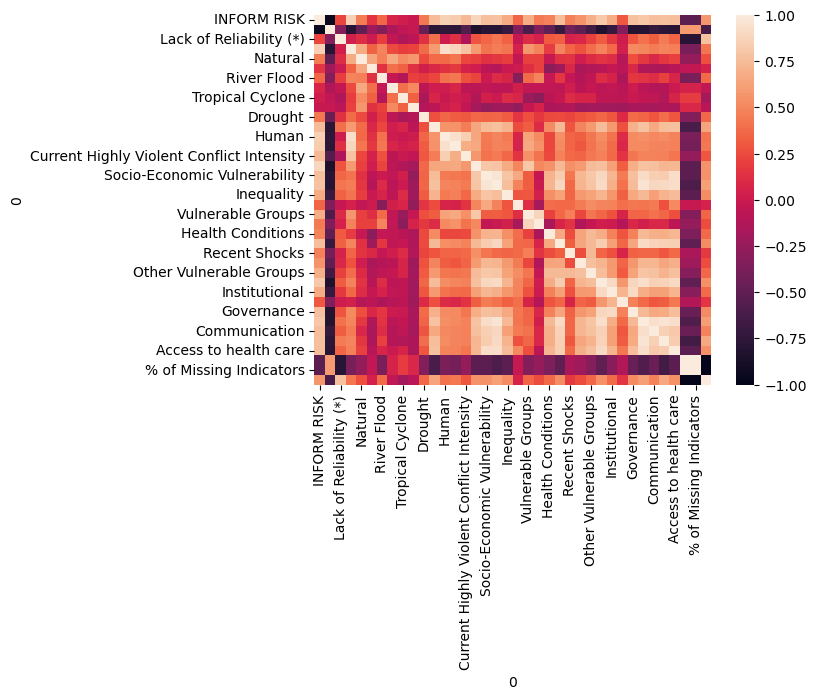

In [69]:
corr = data.corr(numeric_only=True)

#plt.figure(figsize=[20,20])
sns.heatmap(data=corr,vmin=-1,vmax=1)